# ***Data Cleaning and Understanding***
***

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno
import warnings

warnings.filterwarnings('ignore')

In [30]:
# Importing main data
df = pd.read_csv('data/NYC TLC Trip Record.csv')
display(df.head(3),df.tail(3))
# df.tail(1000)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


In [31]:
# importing supporting data = Location ID Zone
df2 = pd.read_csv('data/taxi_zones.csv')
locID = df2[['LocationID','zone','borough']]
locID


,LocationID,zone,borough
0,1,Newark Airport,EWR
1,2,Jamaica Bay,Queens
2,3,Allerton/Pelham Gardens,Bronx
3,4,Alphabet City,Manhattan
4,5,Arden Heights,Staten Island
...,...,...,...
258,256,Williamsburg (South Side),Brooklyn
259,259,Woodlawn/Wakefield,Bronx
260,260,Woodside,Queens
261,261,World Trade Center,Manhattan


## ***Data Wrangling***
***

Dataset tersebut berisi rekaman TLC (Taxi and Limousine) New York City pada bulan Januari 2023. 

#### ***Column Index***
***

In [32]:

def columnindex(x):
    listItem = []
    for col in x.columns :
        listItem.append( [col, x[col].nunique(),x[col].isna().any(),x[col].dtypes,x[col].unique() ])

    tabeldesc = pd.DataFrame(columns=['Column Name', 'Number of Unique','isna','dtype','Unique Sample'],
                         data=listItem)
    # tabeldesc.drop([1,2], axis=0) # drop date and time karena terlalu panjang
    tabeldesc
    return tabeldesc


In [33]:
columnindex(df)

,Column Name,Number of Unique,isna,dtype,Unique Sample
0,VendorID,2,False,int64,"[2, 1]"
1,lpep_pickup_datetime,66575,False,object,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,66519,False,object,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,2,True,object,"[N, Y, nan]"
4,RatecodeID,6,True,float64,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,226,False,int64,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,249,False,int64,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,10,True,float64,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,1870,False,float64,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,2553,False,float64,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


**Insights**
- ***VendorID*** `int` = There are no NaN values, and the data is neat and organized <br>

- ***lpep_picup_datetime*** `object` = There are date that is not on this analysis timeframe. <br >The datasets needs to be formatted into date-time format to be analyzed. The column name will be renamed to PUDatetime for easier analysis. <br>
- ***lpep_dropoff_datetime*** `object` = There are date that is not on this analysis timeframe. <br >The dataset  needs to be formatted into date-time format to be analyzed. The column name will be renamed to DODatetime for easier analysis. <br>
- ***store_and_fwd*** `objet` = The data has NaN values, but the rest of the values are correct (Y or N), to analyze better this data will be encoded.<br>
- ***RatecodeID*** `float` = The data has NaN values, the data are encoded and there are datas with value anomaly that is not supposed to be in the data **[99.0]** <br>
- ***PULocationD*** `int` = The Data values are neat. But there are Location IDs that is not in the Location ID Mapping **[264 and 265]**<br>
- ***DOLocationID*** `int` = The Data values are neat. But there are Location IDs that is not in the Location ID Mapping **[264 and 265]**<br>
- ***passenger_count*** `float` = There are NaN values, and there are data with value anomaly **[0.0]**<br>
- ***trip_distance*** `float` = The Data values are neat (outliers will be further analyzed).<br>
- ***fare_amount*** `float` = The Data values are neat (outliers will be further analyzed). <br>
- ***extra*** `float` = The columns will be dropped since the data has no relevance towards the problem that are being solved.<br>
- ***mta_tax*** `float` = The columns will be dropped since the data has no relevance towards the problem that are being solved.<br>
- ***tip_amount*** `float` = The Data values are neat (outliers will be further analyzed).  <br>
- ***tolls_amount*** `float` = The columns will be dropped since there are only NaN values and the data has no relevance towards the problem that are being solved.<br>
- ***ehail fee*** `float` = The columns will be dropped since there are only NaN values and the data has no relevance towards the problem that are being solved.<br>
- ***improvement_surcharge*** `float` = The columns will be dropped since the data has no relevance towards the problem that are being solved. <br>
- ***total_amont*** `float` = The Data values are neat (outliers will be further analyzed).  <br>
- ***payment_tpe*** `float` = The data has NaN values, but the rest of the values are neat.<br>
- ***trip_type*** `float` = The data has NaN values, but the rest of the values are correct (1 or 2).<br>
- ***congestion_surcharge*** `float` =The columns will be dropped since the data has no relevance towards the problem that are being solved.  <br>

### ***Formatting Date and Time***

Transforming the pickup and dropoff time to a more eligible format, and adding the day name.
***

In [34]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])
display(df['lpep_pickup_datetime'].dtype,
        df['lpep_dropoff_datetime'].dtype)

dtype('<M8[ns]')

dtype('<M8[ns]')

**Adding new columns :  `day` and `duration_min`**

`day`: Create a new column that will contain the day name for each trip, representing the day of the week when the trip occurred.

`duration_min`: Calculate and include a new column to display the trip duration in minutes, which can be derived from your existing 'duration' data.

In [35]:
daycolumn = df['lpep_pickup_datetime'].dt.day_name()
df.insert(3,'day',daycolumn)

In [36]:
data = {
    'VendorID': [2, 2, 2],
    'RatecodeID': [1.0, 1.0, 1.0],
    'PULocationID': [179, 75, 236],
    'DOLocationID': [234, 74, 75],
    'passenger_count': [1.0, 1.0, 1.0],
    'trip_distance': [5.51, 1.28, 0.53],
    'extra': [1.0, 0.0, 0.0],
    'mta_tax': [0.5, 0.5, 0.5],
    'tip_amount': [7.84, 0.00, 1.32],
    'tolls_amount': [0.0, 0.0, 0.0],
    'improvement_surcharge': [1.0, 1.0, 1.0],
    'total_amount': [39.19, 12.20, 7.92],
    'payment_type': [1.0, 2.0, 1.0],
    'trip_type': [1.0, 1.0, 1.0],
    'congestion_surcharge': [2.75, 0.00, 0.00]
}

for i in data.keys():
    print('"'+i+'",')

"VendorID",
"RatecodeID",
"PULocationID",
"DOLocationID",
"passenger_count",
"trip_distance",
"extra",
"mta_tax",
"tip_amount",
"tolls_amount",
"improvement_surcharge",
"total_amount",
"payment_type",
"trip_type",
"congestion_surcharge",


In [37]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], format=r'%Y-%m-%d %H:%M:%S')
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'], format=r'%Y-%m-%d %H:%M:%S')

duration = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60
df.insert(6,'duration_min',duration.round(2))

In [38]:
df.sample(3)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,day,store_and_fwd_flag,RatecodeID,duration_min,PULocationID,DOLocationID,passenger_count,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
54283,2,2023-01-27 09:01:46,2023-01-27 09:31:00,Friday,N,1.0,29.23,83,24,2.0,...,0.0,0.5,0.00,6.55,NaN,1.0,46.75,2.0,1.0,0.0
9809,2,2023-01-06 10:20:38,2023-01-06 10:29:35,Friday,N,1.0,8.95,116,136,1.0,...,0.0,0.5,3.42,0.00,NaN,1.0,20.52,1.0,1.0,0.0
10817,2,2023-01-06 17:33:56,2023-01-06 17:43:48,Friday,N,1.0,9.87,166,166,1.0,...,2.5,0.5,0.00,0.00,NaN,1.0,16.10,2.0,1.0,0.0


**Renaming and splitting column :  `PUtime` and `DOtime`**

`PUdate` and `PUtime`: Splitting `lpep_pickup_datetime` into new columns for the date and time.

`DOdate` and `DOtime`: Splitting `lpep_dropoff_datetime`  into new columns for the date and time.

In [39]:
# splitting the column into date and name
PUdate = pd.to_datetime(df['lpep_pickup_datetime']).dt.date
PUtime = pd.to_datetime(df['lpep_pickup_datetime']).dt.time
DOdate = pd.to_datetime(df['lpep_dropoff_datetime']).dt.date
DOtime = pd.to_datetime(df['lpep_dropoff_datetime']).dt.time


In [40]:
# inserting new columns
df.insert(3,'PUdate',PUdate)
df.insert(4,'DOdate',DOdate)
df.insert(5,'PUtime',PUtime)
df.insert(6,'DOtime',DOtime)

df.drop(columns=['lpep_pickup_datetime','lpep_dropoff_datetime'], inplace=True) # dropping the initial column

### ***Decoding Data***

The data are mostly constructed in ***integers*** data type to make it easier to analyze. For visualization purposes, each data columns that are encoded will be decoded back into their categorical value.
***

> This process are working only on the encoded datasets, undetected outliers and missing values are to be dealt with later.

#### `RatecodeID`
***

The ratecode ID will be decoded based on this mapping:

|ID|Ratecode|
|-|-|
|1|	Standard rate|
|2|	JFK Airport|
|3|	Newark Airport|
|4|	Westchester Village/Unionport|
|5|	Negotiated fare|
|6|	Group ride|

In [41]:
ratecode_map = {1: 'Standard rate', 2: 'JFK Airport', 3: 'Newark Airport', 4: 'Westchester Village/Unionport', 5: 'Negotiated fare', 6: 'Group ride'}
df['RatecodeID'] = df['RatecodeID'].replace(ratecode_map)

In [42]:
df['RatecodeID'].unique()

array(['Standard rate', 'Negotiated fare',
       'Westchester Village/Unionport', 'Newark Airport', 'JFK Airport',
       99.0, nan], dtype=object)

#### `PULocationID` and `DOLocationID`
***

To decode these columns we are extracting the zones and boroughs data from our `locID` datasets, creating new column that is filled with the respective zones and boroughs.

`DOzone` and `PUzone`: 

Decoding Location IDs, namely `DOLocationID` and `PULocationID` , to identify and categorize the respective zones of each trip.

`DOborough` and `PUborough`: 

Decoding Location IDs, namely `DOLocationID` and `PULocationID` , to identify and categorize the respective boroughs of each trip.

In [43]:
# dataframe from the supporting datasets
locID

,LocationID,zone,borough
0,1,Newark Airport,EWR
1,2,Jamaica Bay,Queens
2,3,Allerton/Pelham Gardens,Bronx
3,4,Alphabet City,Manhattan
4,5,Arden Heights,Staten Island
...,...,...,...
258,256,Williamsburg (South Side),Brooklyn
259,259,Woodlawn/Wakefield,Bronx
260,260,Woodside,Queens
261,261,World Trade Center,Manhattan


In [44]:
# merging to extract the pickup zone and borough 
df = df.merge(locID.set_index('LocationID'), left_on='PULocationID', how='left', right_index=True)
df.rename(columns={'zone':'PUzone','borough':'PUborough'},inplace=True)


# merging to extract the dropoff zone and borough 
df = df.merge(locID.set_index('LocationID'), left_on='DOLocationID', how='left', right_index=True)
df.rename(columns={'zone':'DOzone','borough':'DOborough'},inplace=True)

In [45]:
df = df[['PUdate', 'DOdate', 'PUtime', 'DOtime', 'day', 'RatecodeID', 
     'PUzone', 'PUborough',
    'DOzone', 'DOborough', 'duration_min',
    'passenger_count', 'trip_distance', 'fare_amount', 'tip_amount',
    'total_amount', 'payment_type', 'trip_type','congestion_surcharge']]

> However, there are location IDs that are now NaN values, this is because initially there are datas that has the 264 and 265, which do not correspond to any valid location IDs within the `locID` database.

In [46]:
df[['PUzone','PUborough','DOzone','DOborough']].isna().sum()

PUzone       203
PUborough    203
DOzone       684
DOborough    684
dtype: int64

##### **Payment Type**

#### `payment_type`
***

The payment types will be decoded based on this mapping:

|ID|Payment Type|
|-|-|
|1|	Credit card|
|2|	Cash|
|3|	No charge|
|4|	Dispute|
|5|	Unknown|
|6|	Voided Trip|

In [47]:
payment_map = {1: 'Credit card',2: 'Cash',3: 'No charge',4: 'Dispute',5: 'Unknown',6: 'Voided trip'}
df['payment_type'] = df['payment_type'].replace(payment_map)

In [48]:
df['payment_type'].unique()

array(['Credit card', 'Cash', 'No charge', 'Dispute', 'Unknown', nan],
      dtype=object)

#### `trip_type`
***

The payment types will be decoded based on this mapping:
|ID|Trip Type|
|-|-|
|1|	Street hail|
|2|	Dispatch|


In [49]:
df['trip_type'] = df['trip_type'].replace({1: 'street hail', 2: 'dispatch'})

In [50]:
df['trip_type'].unique()

array(['street hail', 'dispatch', nan], dtype=object)

##### **Decoded Datasets**

***


In [51]:
df

,PUdate,DOdate,PUtime,DOtime,day,RatecodeID,PUzone,PUborough,DOzone,DOborough,duration_min,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,congestion_surcharge
0,2023-01-01,2023-01-01,00:26:10,00:37:11,Sunday,Standard rate,Morningside Heights,Manhattan,Lincoln Square West,Manhattan,11.02,1.0,2.58,14.90,4.03,24.18,Credit card,street hail,2.75
1,2023-01-01,2023-01-01,00:51:03,00:57:49,Sunday,Standard rate,Bloomingdale,Manhattan,Central Park,Manhattan,6.77,1.0,1.81,10.70,2.64,15.84,Credit card,street hail,0.00
2,2023-01-01,2023-01-01,00:35:12,00:41:32,Sunday,Standard rate,Steinway,Queens,Old Astoria,Queens,6.33,1.0,0.00,7.20,1.94,11.64,Credit card,street hail,0.00
3,2023-01-01,2023-01-01,00:13:14,00:19:03,Sunday,Standard rate,Central Harlem,Manhattan,Upper West Side North,Manhattan,5.82,1.0,1.30,6.50,1.70,10.20,Credit card,street hail,0.00
4,2023-01-01,2023-01-01,00:33:04,00:39:02,Sunday,Standard rate,Central Harlem,Manhattan,East Harlem North,Manhattan,5.97,1.0,1.10,6.00,0.00,8.00,Credit card,street hail,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2023-01-31,2023-01-31,22:29:00,22:42:00,Tuesday,NaN,Clinton Hill,Brooklyn,Crown Heights South,Brooklyn,13.00,NaN,4070.82,15.70,0.00,16.70,NaN,NaN,NaN
68207,2023-01-31,2023-01-31,22:40:00,22:48:00,Tuesday,NaN,Baisley Park,Queens,Saint Albans,Queens,8.00,NaN,2.14,4.41,0.00,5.41,NaN,NaN,NaN
68208,2023-01-31,2023-02-01,23:46:00,00:02:00,Tuesday,NaN,DUMBO/Vinegar Hill,Brooklyn,Bushwick South,Brooklyn,16.00,NaN,3.44,16.53,3.51,21.04,NaN,NaN,NaN
68209,2023-01-31,2023-01-31,23:01:00,23:19:00,Tuesday,NaN,Stuyvesant Heights,Brooklyn,Prospect Heights,Brooklyn,18.00,NaN,3.03,14.98,3.20,19.18,NaN,NaN,NaN


## ***Data Cleaning***

### ***Column Index****

In [52]:
columnindex(df)

,Column Name,Number of Unique,isna,dtype,Unique Sample
0,PUdate,34,False,object,"[2023-01-01, 2022-12-09, 2023-01-02, 2023-01-0..."
1,DOdate,34,False,object,"[2023-01-01, 2023-01-02, 2022-12-09, 2023-01-0..."
2,PUtime,41521,False,object,"[00:26:10, 00:51:03, 00:35:12, 00:13:14, 00:33..."
3,DOtime,41484,False,object,"[00:37:11, 00:57:49, 00:41:32, 00:19:03, 00:39..."
4,day,7,False,object,"[Sunday, Friday, Monday, Tuesday, Wednesday, T..."
5,RatecodeID,6,True,object,"[Standard rate, Negotiated fare, Westchester V..."
6,PUzone,223,True,object,"[Morningside Heights, Bloomingdale, Steinway, ..."
7,PUborough,6,True,object,"[Manhattan, Queens, Brooklyn, Bronx, nan, Stat..."
8,DOzone,246,True,object,"[Lincoln Square West, Central Park, Old Astori..."
9,DOborough,6,True,object,"[Manhattan, Queens, Brooklyn, nan, Bronx, Stat..."


In [53]:
df.describe(include='float')

,duration_min,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,congestion_surcharge
count,68658.000000,64322.000000,68658.000000,68658.000000,68658.000000,68658.000000,64322.000000
mean,18.084133,1.315444,8.076382,16.595820,2.129921,21.768156,0.721957
std,74.828558,0.977949,583.198360,13.446101,3.048400,15.428186,1.210258
min,0.000000,0.000000,0.000000,-70.000000,-10.500000,-71.500000,-2.750000
25%,7.220000,1.000000,1.110000,9.300000,0.000000,12.900000,0.000000
50%,11.400000,1.000000,1.850000,13.500000,1.520000,17.880000,0.000000
75%,17.470000,1.000000,3.200000,19.800000,3.300000,26.150000,2.750000
max,1439.880000,9.000000,120098.840000,490.000000,222.220000,491.000000,2.750000


### ***Missing Value and Outliers***
***

In [54]:
df[df.isna().any(axis=1)].sample(4)

,PUdate,DOdate,PUtime,DOtime,day,RatecodeID,PUzone,PUborough,DOzone,DOborough,duration_min,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,congestion_surcharge
67825,2023-01-28,2023-01-28,22:15:00,22:31:00,Saturday,NaN,Steinway,Queens,Washington Heights South,Manhattan,16.00,NaN,7.36,26.45,6.80,40.80,NaN,NaN,NaN
28677,2023-01-15,2023-01-15,05:08:20,05:08:22,Sunday,Negotiated fare,East Williamsburg,Brooklyn,NaN,NaN,0.03,3.0,0.25,45.00,11.50,57.50,Credit card,dispatch,0.0
65586,2023-01-13,2023-01-13,14:31:00,14:53:00,Friday,NaN,Washington Heights South,Manhattan,Fordham South,Bronx,22.00,NaN,3.20,19.36,0.35,20.71,NaN,NaN,NaN
65676,2023-01-14,2023-01-14,00:21:00,00:39:00,Saturday,NaN,Washington Heights South,Manhattan,Clinton East,Manhattan,18.00,NaN,6.58,29.55,5.00,38.30,NaN,NaN,NaN


***Insights***
> Other than `trip_type`, all columns that are missing datas are missing them in the same amount.
And using sampling it is concluded that most of the columns with missing data are located within the same rows.

- `PUdate` and `DOdate` : Filter the data that is not in the analysis timeframe (2023-01-1 until 2023-01-31)
- `PUzone` and `DOzone` : Dealing with outliers

- `duration_min` : Deaeling with outliers 
- `RatecodeID`: Dealing with NaN values and wrong input [99.0]
- `passenger_count`: Handling the NaN values and passengers that are off the NYC passenger limit (min=1, max-4)   [Ref](https://www.takewalks.com/blog/nyc-taxis)
- `trip_distance` : Dealing with outliers and Nan values. Assuming that the upper bound is 50 (Furthest drive in NYC)  [Ref](https://intip.in/NYCfurthest)
- `fare_amount` :  Dealing with outliers and NaN values. There are some numbers that doesn't make sense (negative and overly paid). - Negative can mean out of pocket (so just make it +)
- `tip_amount` : Dealing with outliers and NaN values.
- `total_amount`: Dealing with outliers and NaN values.
- `payment_type` and `trip_type`: Dealing with NaN values.

#### `PUdate` and `DOdate`
***
Dropping and excluding data which the `PUdate` falls outside the specified analysis timeframe, which spans from January 1, 2023, to January 31, 2023.


In [55]:
df['PUdate'] = pd.to_datetime(df['PUdate'])
df['DOdate'] = pd.to_datetime(df['DOdate'])

start_date = pd.Timestamp('2023-01-01')
end_date = pd.Timestamp('2023-01-31')

In [56]:
initial = df.copy()

# filtering the date
df = df[(df['PUdate'] >= start_date) & (df['PUdate'] <= end_date)]

print(f'''
      Initial data: {len(initial)}
      Processed data: {len(df)}
      Data dropped: {len(initial)-len(df)}''')


      Initial data: 68658
      Processed data: 68653
      Data dropped: 5


#### `duration_min`
***
- The duration are limited to 60 minutes, since it is the time of NYC's in-city furthest drive.


In [57]:
df['duration_min'].min()

0.0

<Axes: >

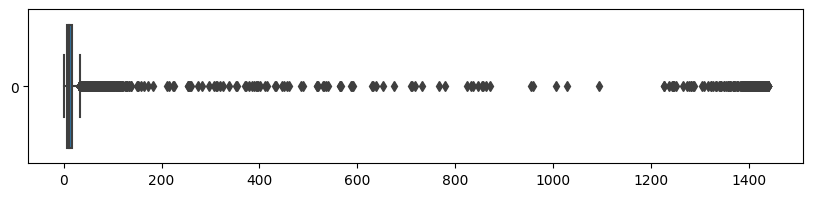

In [58]:
plt.figure(figsize=(10,2))
sns.boxplot(df['duration_min'], orient='h')

In [59]:
initial = df.copy()
df = df[(df['duration_min']<60)]

print(f'''
      Initial data: {len(initial)}
      Processed data: {len(df)}
      Data dropped: {len(initial)-len(df)}''')


      Initial data: 68653
      Processed data: 68024
      Data dropped: 629


<Axes: >

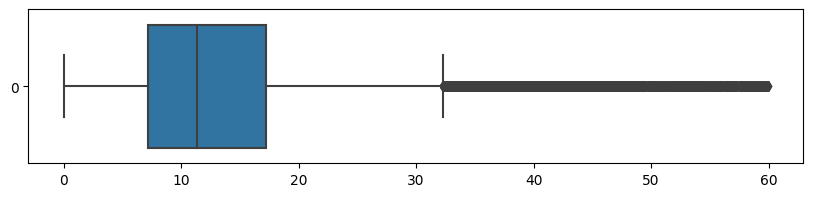

In [60]:
plt.figure(figsize=(10,2))
sns.boxplot(df['duration_min'], orient='h')

#### `PUzone` and `DOzone`
***
The filtered data pickup and dropoff location produce some NaN values because of the undetected location IDs. <br> These data will be dropped assuming that the location ID is not on NYC's taxi zone.

In [61]:
df[['PUzone','PUborough','DOzone','DOborough']].isna().sum()

PUzone       194
PUborough    194
DOzone       652
DOborough    652
dtype: int64

In [62]:
initial = df.copy()

# dropping the NaNs
df.dropna(subset=['PUzone','DOzone'], inplace=True)

print(f'''
      Initial data: {len(initial)}
      Processed data: {len(df)}
      Data dropped: {len(initial)-len(df)}''')


      Initial data: 68024
      Processed data: 67334
      Data dropped: 690


In [63]:
df[['PUzone','PUborough','DOzone','DOborough']].isna().sum()

PUzone       0
PUborough    0
DOzone       0
DOborough    0
dtype: int64

### `RatecodeID`
***
- If the Ratecode data are 99.0 then it will be assigned as NaN
- If the Drop-off Zone are one of **JFK, Newark, Westchester** it will be assigned to the respective fare.
- If the `total amount` are integers, then it will be assumed to 5 (Negotiated fare).
- If the values are neither of these criteria, it will be assigned to 1 (Standard Rate)



In [64]:
df['RatecodeID'].unique()

array(['Standard rate', 'Negotiated fare', 'Newark Airport',
       'JFK Airport', 99.0, 'Westchester Village/Unionport', nan],
      dtype=object)

In [65]:
columnshowed = ['PUdate', 'DOdate', 'PUtime', 'DOtime', 'day', 'RatecodeID','PUzone', 'PUborough', 'DOzone','DOborough'] # limiting column 
ratecode_mapping = ['Westchester Village/Unionport',  'Newark Airport',  'JFK Airport']

# Displaying the sample of NaN ratecode within the mapping
dfisna = df[df['RatecodeID'].isna()]
PUzoneNaN = dfisna[dfisna['PUzone'].isin(ratecode_mapping)][columnshowed].sort_values(by='PUzone').drop_duplicates(subset='PUzone',keep='first')
DOzoneNaN = dfisna[dfisna['DOzone'].isin(ratecode_mapping)][columnshowed].sort_values(by='DOzone').drop_duplicates(subset='DOzone',keep='first')
ratecodeNaNsample = pd.concat([PUzoneNaN,DOzoneNaN])

ratecodeNaNsample

,PUdate,DOdate,PUtime,DOtime,day,RatecodeID,PUzone,PUborough,DOzone,DOborough
66609,2023-01-20,2023-01-20,12:17:00,12:18:00,Friday,NaN,JFK Airport,Queens,JFK Airport,Queens
65394,2023-01-12,2023-01-12,10:22:00,10:46:00,Thursday,NaN,Westchester Village/Unionport,Bronx,Claremont/Bathgate,Bronx
63983,2023-01-01,2023-01-01,08:01:00,08:29:00,Sunday,NaN,Bedford,Brooklyn,JFK Airport,Queens
64952,2023-01-09,2023-01-09,04:06:00,04:58:00,Monday,NaN,Forest Hills,Queens,Newark Airport,EWR
68048,2023-01-30,2023-01-30,17:03:00,17:29:00,Monday,NaN,East Harlem South,Manhattan,Westchester Village/Unionport,Bronx


In [66]:
# changing the 99.0 values to NaN
df['RatecodeID'] = np.where(df['RatecodeID']==99, np.nan, df['RatecodeID'])

# Imputating all the NaN values based on the criteria
df['RatecodeID'] = np.where(
df['RatecodeID'].isna(),
np.where(df['DOzone'].isin(ratecode_mapping),
df['DOzone'],
np.where(df['PUzone'].isin(ratecode_mapping),
df['PUzone'],
np.where(df['total_amount'] % 1 == 0,
'Negotiated fare', 'Standard rate'))),df['RatecodeID'])

In [67]:
df['RatecodeID'].unique()

array(['Standard rate', 'Negotiated fare', 'Newark Airport',
       'JFK Airport', 'Westchester Village/Unionport'], dtype=object)

### `passenger_count`
***
- If the values are below 1 and NaN, the data will be assigned to 1 (minimum passenger counts) 
- If passengers that are off the NYC passenger limit, the data will be assigned to the NYC maximum passenger limit = 4  [Ref](https://www.takewalks.com/blog/nyc-taxis)

In [68]:
sorted(df['passenger_count'].unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, nan]

In [69]:
df['passenger_count'].isna().sum()

4285

In [70]:
df['passenger_count'] = np.where((df['passenger_count'] > 4) | (np.isnan(df['passenger_count'])), 4, np.where(df['passenger_count']<1, 1, df['passenger_count']))

In [71]:
sorted(df['passenger_count'].unique())

[1.0, 2.0, 3.0, 4.0]

### `trip_distance`
***
- Assuming the upper bound is 50 (Furthest drive in NYC)  [Ref](https://intip.in/NYCfurthes)
- If the values are outside the upper bound and the fare amount, it will be dropped. Because in this analysis we are primarily focusing on the taxi rides inside of NYC.
- If the values are below 1 the data will be dropped. Since it is assumed that it was unlikely and has no significant correlation with other columns, therefore it is hard to predict the imputation

In [72]:
df.corr(numeric_only='True')['trip_distance']

duration_min            0.010849
passenger_count         0.025265
trip_distance           1.000000
fare_amount             0.013983
tip_amount              0.003264
total_amount            0.012487
congestion_surcharge    0.088527
Name: trip_distance, dtype: float64

<Axes: >

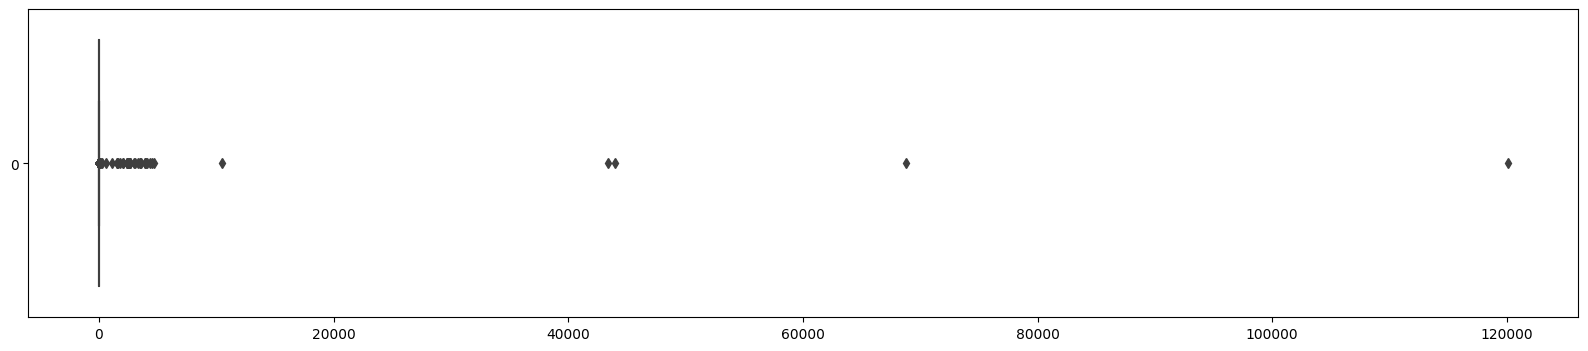

In [73]:
plt.figure(figsize=(20,4))
sns.boxplot(df['trip_distance'], orient='h')

In [74]:
initial = df.copy()

# converting the 0 to NaN and dropping them
df['trip_distance'] = np.where((df['trip_distance']<1) | (df['trip_distance']>50) , np.nan, df['trip_distance'])
df.dropna(subset=['trip_distance'], inplace=True)


print(f'''
      Initial data: {len(initial)}
      Processed data: {len(df)}
      Data dropped: {len(initial)-len(df)}''')


      Initial data: 67334
      Processed data: 53722
      Data dropped: 13612


<Axes: >

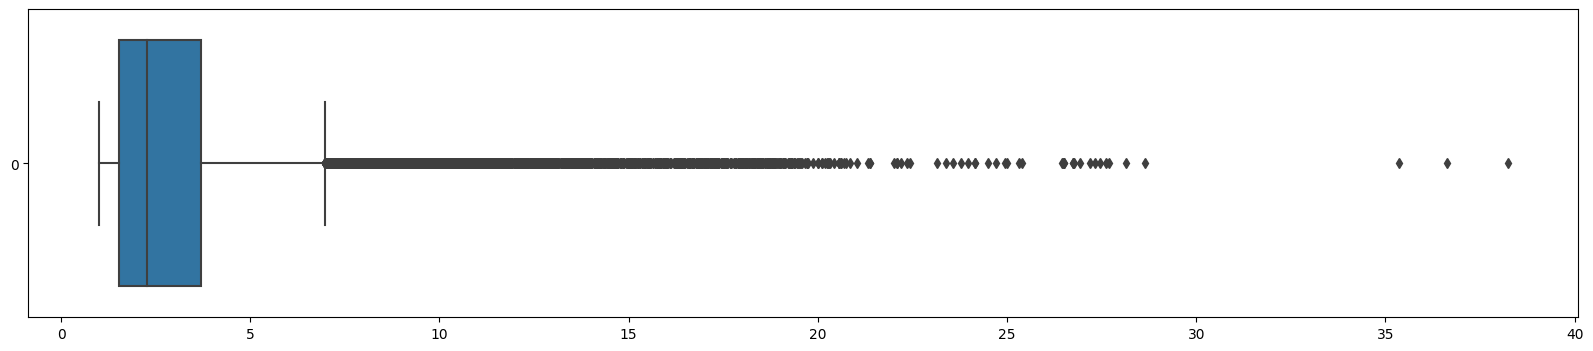

In [75]:
plt.figure(figsize=(20,4))
sns.boxplot(df['trip_distance'], orient='h')

> There are still outliers in the data, primarily due to the occasional occurrence of extended trips across NYC, despite the majority of trips being of shorter duration.

In [76]:
df[df['trip_distance'] == df['trip_distance'].max()]['fare_amount']

40942    140.2
Name: fare_amount, dtype: float64

### `fare_amount` :  
***
- If the fare amount is negative, then it will be assigned to it's absolute counterparts (positive)
- If the fare amount is more than 150 then it will considered an outliers, and will be dropped.
- If the fare amount in $ 1.5 it will be considered not significant enough for the data, and will be dropped.

> The fare amount of the longest trip distance is 140

In [77]:
initial = df.copy()

# converting the 0 to NaN and dropping them
df['fare_amount'] = np.where(df['fare_amount']<0, df['fare_amount']*-1,
                    np.where((df['fare_amount']>150) | (df['fare_amount']<=1.5), np.nan, 
                     df['fare_amount']
                             )) 

df.dropna(subset='fare_amount', inplace=True)

print(f'''
      Initial data: {len(initial)}
      Processed data: {len(df)}
      Data dropped: {len(initial)-len(df)}''')


      Initial data: 53722
      Processed data: 53706
      Data dropped: 16


- Looking the correlation between fare and total

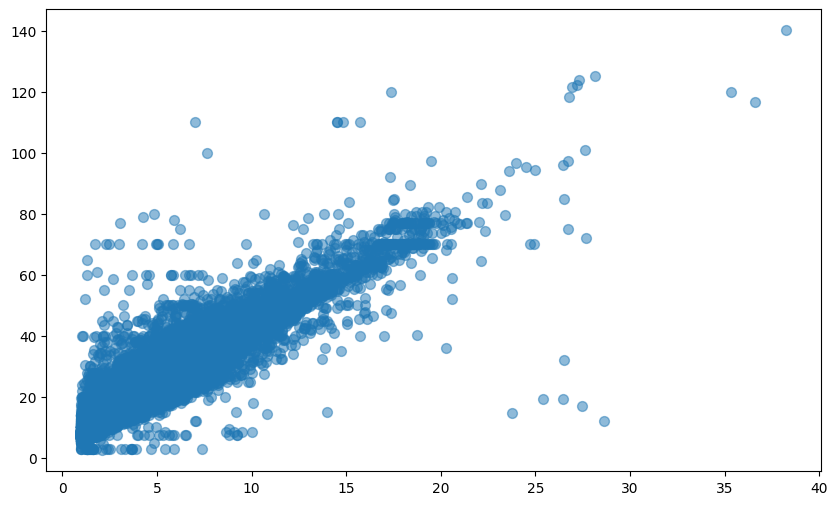

In [123]:
a = df[['fare_amount','trip_distance']]
# plt.scatter(y=df['fare_amount'],x=df['trip_distance'], scatter_kws={'alpha':0.5})

plt.figure(figsize=(10, 6))
plt.scatter(y=df['fare_amount'],x=df['trip_distance'], alpha=0.5, s=50)

In [135]:
df.RatecodeID.unique()[0:5]

array(['Standard rate', 'Negotiated fare', 'Newark Airport',
       'JFK Airport', 'Westchester Village/Unionport'], dtype=object)

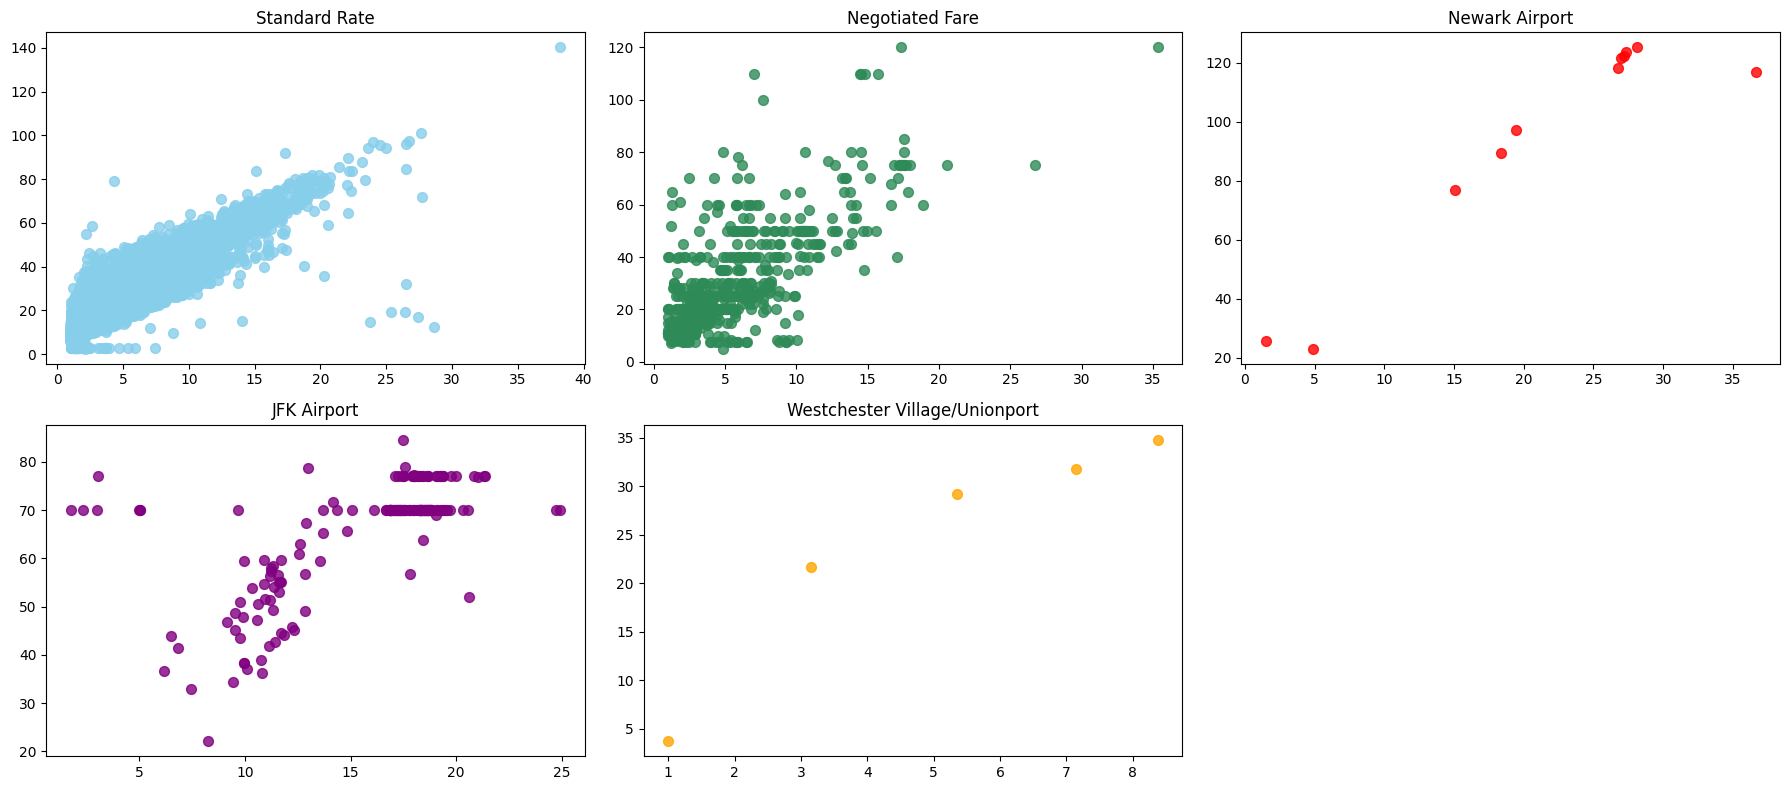

In [160]:
fig, ax = plt.subplots(2, 3, figsize=(18, 8))

conditions = [("RatecodeID == 'Standard rate'", 'skyblue'),
    ("RatecodeID == 'Negotiated fare'", 'seagreen'),
    ("RatecodeID == 'Newark Airport'", 'red'),
    ("RatecodeID == 'JFK Airport'", 'purple'),
    ("RatecodeID == 'Westchester Village/Unionport'", 'orange')]
titles = ['Standard Rate', 'Negotiated Fare', 'Newark Airport', 'JFK Airport','Westchester Village/Unionport']

for i, (condition, color) in enumerate(conditions):
    subplot = ax[i // 3, i % 3]
    data = df.query(condition)
    subplot.scatter(x=data['trip_distance'], y=data['fare_amount'], alpha=0.8, s=50, c=color)
    subplot.set_title(titles[i])

fig.delaxes(ax[1, 2])
plt.tight_layout()

plt.show()


In [79]:
df[df['total_amount']<(df['fare_amount']+df['tip_amount'])]

,PUdate,DOdate,PUtime,DOtime,day,RatecodeID,PUzone,PUborough,DOzone,DOborough,duration_min,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,congestion_surcharge
64487,2023-01-05,2023-01-05,10:51:00,11:20:00,Thursday,Standard rate,Hamilton Heights,Manhattan,Manhattan Valley,Manhattan,29.0,4.0,2.22,43.54,0.76,-41.78,NaN,NaN,NaN
65108,2023-01-10,2023-01-10,10:00:00,10:26:00,Tuesday,Standard rate,Mott Haven/Port Morris,Bronx,Melrose South,Bronx,26.0,4.0,3.45,17.38,0.26,-16.12,NaN,NaN,NaN
67461,2023-01-26,2023-01-26,10:10:00,10:20:00,Thursday,Standard rate,West Farms/Bronx River,Bronx,Hunts Point,Bronx,10.0,4.0,1.51,15.53,0.22,-14.31,NaN,NaN,NaN


### `tip_amount` :  
***
- If the tip amount is not reasonable (more than 100% the fare amount) it will be dropped, because it might alter the data conclusion

<Axes: >

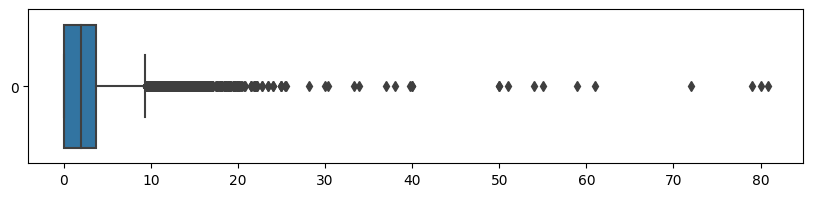

In [80]:
plt.figure(figsize=(10,2))
sns.boxplot(df['tip_amount'], orient='h')

In [81]:
df = df[df['tip_amount']<(df['fare_amount']*1.5)]

print(f'''
      Initial data: {len(initial)}
      Processed data: {len(df)}
      Data dropped: {len(initial)-len(df)}''')


      Initial data: 53722
      Processed data: 53690
      Data dropped: 32


<Axes: >

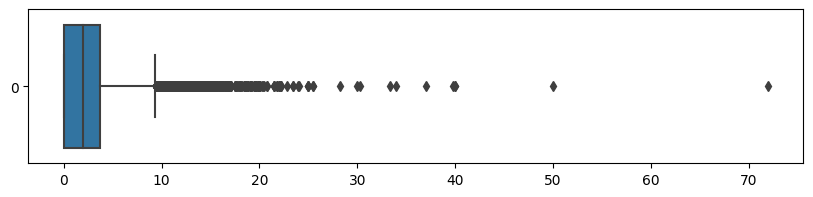

In [82]:
plt.figure(figsize=(10,2))
sns.boxplot(df['tip_amount'], orient='h')

### `total_amount`
***
- If the total amount is negative, then it will be assigned to it's absolute counterparts (positive), this might resulted because of earlier missing data (`fare_amount` or `trip_amount`)
- If the total of `fare_amount` + `tip_amount` is larger than `total_amount` it will be dropped.
- If the total amount in 0 then it will be dropped.

> The total amount of the longest trip distance is 160

<Axes: >

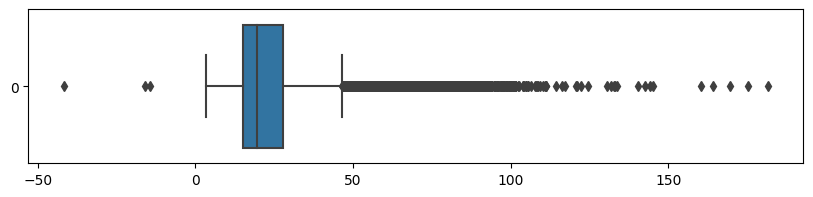

In [83]:
plt.figure(figsize=(10,2))
sns.boxplot(df['total_amount'], orient='h')

In [84]:
df['total_amount'] = np.where(df['total_amount']<0, df['total_amount']*-1, 
                              np.where(((df['total_amount']<(df['fare_amount']+df['tip_amount'])) | df['total_amount']==0), np.nan, df['total_amount']))
df.dropna(subset='total_amount',inplace=True)

print(f'''
      Initial data: {len(initial)}
      Processed data: {len(df)}
      Data dropped: {len(initial)-len(df)}''')


      Initial data: 53722
      Processed data: 53690
      Data dropped: 32


<Axes: >

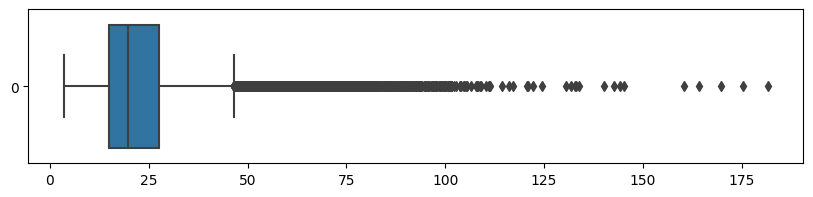

In [85]:
plt.figure(figsize=(10,2))
sns.boxplot(df['total_amount'], orient='h')

### `payment_type`
***
- Assigning the NaN values into 'unknown'
- The ones with the value 'No charge' are going to be dropped. Since it has no relenvant in the analysis.

In [86]:
df['payment_type'].unique()

array(['Credit card', 'Cash', 'No charge', 'Dispute', nan], dtype=object)

In [87]:
df['payment_type'].fillna('unknown', inplace=True)
df.drop(df[df['payment_type']=='No charge'].index, inplace=True)

In [88]:
df['payment_type'].unique()

array(['Credit card', 'Cash', 'Dispute', 'unknown'], dtype=object)

### `trip_type`
***
- Assigning the NaN values into 'street hail' assuming that if the order was made via dispatch, it is more likely to be recorded.

In [89]:
df['trip_type'].unique()

array(['street hail', 'dispatch', nan], dtype=object)

In [90]:
df['trip_type'].fillna('street hail', inplace=True)

In [91]:
df['trip_type'].unique()

array(['street hail', 'dispatch'], dtype=object)

### `congestion_surcharge`
***
- The values will be assigned to a 'Y' and 'N' value.
- The NaN values will be assigned to 'N'

In [92]:
df['congestion_surcharge'].fillna(0)

df['congestion_surcharge'] = np.where(df['congestion_surcharge']==0, 'N', 'Y')
df.rename(columns={'congestion_surcharge': 'congestion'}, inplace=True)

In [93]:
df['congestion'].unique()

array(['Y', 'N'], dtype=object)

## **Cleaned Data**

In [94]:
# resorting and reformating cleaned data

df.sort_values(by=['PUdate', 'PUtime'], inplace=True)
df.reset_index(drop=True,inplace=True)

In [95]:
df

,PUdate,DOdate,PUtime,DOtime,day,RatecodeID,PUzone,PUborough,DOzone,DOborough,duration_min,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,congestion
0,2023-01-01,2023-01-01,00:01:31,00:16:02,Sunday,Standard rate,Morningside Heights,Manhattan,Washington Heights South,Manhattan,14.52,1.0,2.48,16.30,3.76,22.56,Credit card,street hail,N
1,2023-01-01,2023-01-01,00:04:25,00:17:50,Sunday,Standard rate,Williamsburg (North Side),Brooklyn,Long Island City/Queens Plaza,Queens,13.42,1.0,2.80,16.30,2.80,21.60,Credit card,street hail,N
2,2023-01-01,2023-01-01,00:08:05,00:13:26,Sunday,Standard rate,Central Harlem,Manhattan,East Harlem South,Manhattan,5.35,4.0,1.05,5.50,1.36,8.16,Credit card,street hail,N
3,2023-01-01,2023-01-01,00:08:43,00:17:08,Sunday,Standard rate,East Harlem South,Manhattan,Lenox Hill East,Manhattan,8.42,1.0,1.99,11.40,3.33,19.98,Credit card,street hail,Y
4,2023-01-01,2023-01-01,00:09:14,00:26:39,Sunday,Standard rate,Park Slope,Brooklyn,Chinatown,Manhattan,17.42,2.0,3.80,19.10,4.85,29.20,Credit card,street hail,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53598,2023-01-31,2023-02-01,23:46:00,00:02:00,Tuesday,Standard rate,DUMBO/Vinegar Hill,Brooklyn,Bushwick South,Brooklyn,16.00,4.0,3.44,16.53,3.51,21.04,unknown,street hail,Y
53599,2023-01-31,2023-02-01,23:51:00,00:07:00,Tuesday,Standard rate,Williamsburg (South Side),Brooklyn,Lenox Hill East,Manhattan,16.00,4.0,5.82,23.65,2.00,29.40,unknown,street hail,Y
53600,2023-01-31,2023-02-01,23:53:41,00:31:14,Tuesday,Standard rate,Elmhurst,Queens,Elmhurst/Maspeth,Queens,37.55,2.0,6.44,38.00,0.00,40.50,Cash,street hail,N
53601,2023-01-31,2023-02-01,23:56:16,00:03:16,Tuesday,Standard rate,Forest Hills,Queens,Rego Park,Queens,7.00,1.0,1.16,8.60,2.22,13.32,Credit card,street hail,N


In [96]:
columnindex(df)

,Column Name,Number of Unique,isna,dtype,Unique Sample
0,PUdate,31,False,datetime64[ns],"[2023-01-01 00:00:00, 2023-01-02 00:00:00, 202..."
1,DOdate,32,False,datetime64[ns],"[2023-01-01 00:00:00, 2023-01-02 00:00:00, 202..."
2,PUtime,35268,False,object,"[00:01:31, 00:04:25, 00:08:05, 00:08:43, 00:09..."
3,DOtime,35434,False,object,"[00:16:02, 00:17:50, 00:13:26, 00:17:08, 00:26..."
4,day,7,False,object,"[Sunday, Monday, Tuesday, Wednesday, Thursday,..."
5,RatecodeID,5,False,object,"[Standard rate, Negotiated fare, Newark Airpor..."
6,PUzone,191,False,object,"[Morningside Heights, Williamsburg (North Side..."
7,PUborough,5,False,object,"[Manhattan, Brooklyn, Queens, Bronx, Staten Is..."
8,DOzone,241,False,object,"[Washington Heights South, Long Island City/Qu..."
9,DOborough,6,False,object,"[Manhattan, Queens, Brooklyn, Bronx, Staten Is..."


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53603 entries, 0 to 53602
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   PUdate           53603 non-null  datetime64[ns]
 1   DOdate           53603 non-null  datetime64[ns]
 2   PUtime           53603 non-null  object        
 3   DOtime           53603 non-null  object        
 4   day              53603 non-null  object        
 5   RatecodeID       53603 non-null  object        
 6   PUzone           53603 non-null  object        
 7   PUborough        53603 non-null  object        
 8   DOzone           53603 non-null  object        
 9   DOborough        53603 non-null  object        
 10  duration_min     53603 non-null  float64       
 11  passenger_count  53603 non-null  float64       
 12  trip_distance    53603 non-null  float64       
 13  fare_amount      53603 non-null  float64       
 14  tip_amount       53603 non-null  float

In [98]:
df.to_csv(r"data/NYC TLC Trip Record (CLEAN).csv", index = None, header=True)